In [47]:
import pandas as pd
pd.set_option('display.max_columns', 600)

from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

In [2]:
clinical = pd.read_csv('./data.csv')
mrna = pd.read_csv('./mRNA.csv')
mrna['Unnamed: 0'] = mrna['Unnamed: 0'].apply(lambda x: '.'.join(x.split('-')[0:4]))
mrna.index = mrna['Unnamed: 0']
mrna = mrna.drop('Unnamed: 0', axis=1)
clinical = clinical[['BRAF', 'name', 'multifocality']]
clinical2 = pd.merge(clinical, mrna, left_on='name', right_index=True)

clinical2 = clinical2.dropna(axis=0)
clinical2 = clinical2[clinical2['BRAF_x'] == 1]

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


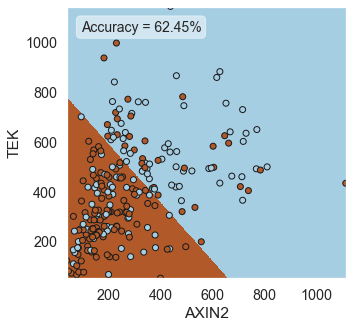

In [3]:
X = clinical2[['AXIN2', 'TEK']]
Y = clinical2['multifocality']

Y = Y == 'unifocal'

logreg = LogisticRegression(C=1e5)

logreg.fit(X, Y)

x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

h = 1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(5,5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('AXIN2')
plt.ylabel('TEK')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
textstr = 'Accuracy = %.2f%%' %(logreg.score(X, Y)*100)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.savefig('./logi_TEK_AXIN2.png', dpi=300, bbox_inches='tight')

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


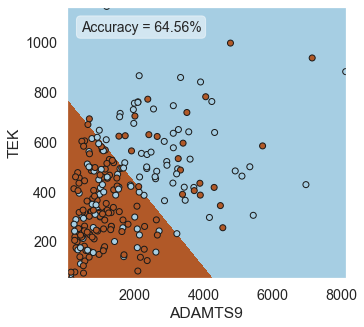

In [4]:
X = clinical2[['ADAMTS9', 'TEK']]
Y = clinical2['multifocality']

Y = Y == 'unifocal'

logreg = LogisticRegression(C=1e5)

logreg.fit(X, Y)

x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

h = 1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(5,5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('ADAMTS9')
plt.ylabel('TEK')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
textstr = 'Accuracy = %.2f%%' %(logreg.score(X, Y)*100)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('./logi_ADAMTS9_TEK.png', dpi=300, bbox_inches='tight')

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


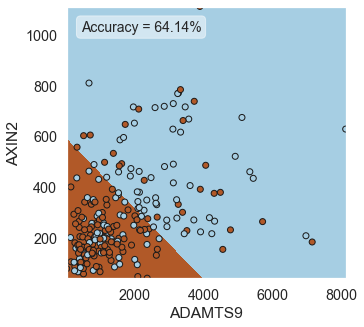

In [5]:
X = clinical2[['ADAMTS9', 'AXIN2']]
Y = clinical2['multifocality']

Y = Y == 'unifocal'

logreg = LogisticRegression(C=1e5)

logreg.fit(X, Y)

x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

h = 1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(5,5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('ADAMTS9')
plt.ylabel('AXIN2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
textstr = 'Accuracy = %.2f%%' %(logreg.score(X, Y)*100)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


plt.savefig('./logi_ADAMTS9_AXIN2.png', dpi=300, bbox_inches='tight')

In [116]:
X1 = clinical2[['AXIN2', 'TEK']]
Y1 = clinical2['multifocality']

Y1 = Y1 == 'multifocal'

logreg1 = LogisticRegression(C=1e5)

logreg1.fit(X1, Y1)

X2 = clinical2[['ADAMTS9', 'TEK']]
Y2 = clinical2['multifocality']

Y2 = Y2 == 'multifocal'

logreg2 = LogisticRegression(C=1e5)

logreg2.fit(X2, Y2)

X3 = clinical2[['ADAMTS9', 'AXIN2']]
Y3 = clinical2['multifocality']

Y3 = Y3 == 'multifocal'

logreg3 = LogisticRegression(C=1e5)

logreg3.fit(X3, Y3)

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [117]:
from sklearn import metrics

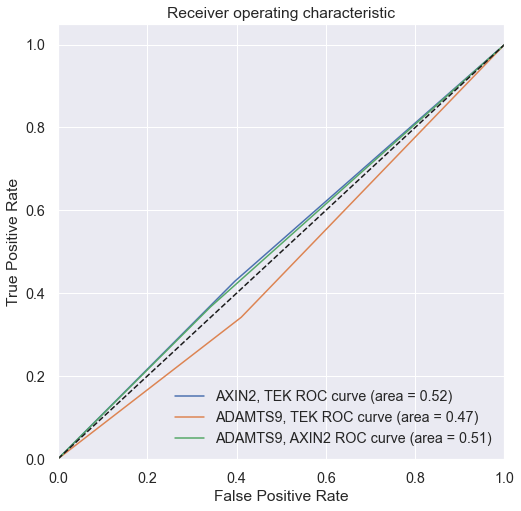

In [119]:
pred1 = pd.DataFrame([logreg.predict(X1),Y1]).T
pred1.columns = ['predict', 'unifocal']

pred2 = pd.DataFrame([logreg.predict(X2),Y2]).T
pred2.columns = ['predict', 'unifocal']

pred3 = pd.DataFrame([logreg.predict(X3),Y3]).T
pred3.columns = ['predict', 'unifocal']

plt.figure(figsize=(8,8))

y = logreg.predict(X1)
scores = y == Y1

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AXIN2, TEK ROC curve (area = %0.2f)' % roc_auc)



y = logreg.predict(X2)
scores = y == Y2

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ADAMTS9, TEK ROC curve (area = %0.2f)' % roc_auc)




y = logreg.predict(X3)
scores = y == Y3

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ADAMTS9, AXIN2 ROC curve (area = %0.2f)' % roc_auc)




plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()